# Imports

In [1]:
import pandas as pd
import re

import warnings
warnings.filterwarnings('ignore')

import unicodedata
import nltk
from nltk.tokenize.toktok import ToktokTokenizer
from nltk.corpus import stopwords

import matplotlib.pyplot as plt
import seaborn as sns
import os

from sklearn.model_selection import train_test_split
import sklearn.preprocessing
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

import wrangle as w
import explore as e
import modeling as m

# Acquire

* Data aquired from [Kaggle](https://www.kaggle.com/satpreetmakhija/netflix-movies-and-tv-shows-2021) on 2/04/2022
* Each observation represents on movie or film series 
* Because the distinction between a single movie an a multi-part series is not relevant to this study I will be referring to each as a movie for the duration of this study
* The original data set had 5967 rows and 13 columns

# Prepare

* The dataframe retained 5447 and 2 columns after preperarion
* Data was prepared using the fillowing steps:
    * Drop all columns other than 'description' and 'genre'
    * Lowercased text in both columns
    * Lowercased column names
    * Prepared text in 'description' for exploration using the following steps:
      * Removed all non-ascii and special characters form the text
      * Tokenized the words in the text
      * Lemmatized the words in the text
      * Removed stopwords
    * my goal for genre was to insure that each film only represented one genre after preperation
    * Prepared genre text using the following steps:
      * Removed text indicating if a film is a standalone movie or series
      * Created new column of curated list of genres       
      * The following genres were removed because they do not refer the films theam:
          * international
          * korean
          * teen
          * british
          * spanish-language 
          * independent
          * anime
          * kids
          * children & family    
          * classic & cult
          * classic
          * cult
      * The following genres were removed due to low representation
          * lgbtq
          * sci-fi & fantasy
          * sports
          * faith & spirituality
          * stand-up comedy & talk
          * mysteries    
      * Merged films with docuseries, documentary, or documentaries in it's genre list together into one genre documentaries
      * Merged together films with the following geres together under that genre alone
          * reality
          * music & musicals
          * crime
          * horror
      * Removed dramas from genre lists that contained three or more genes
      * Fused together the following genres to create new genres
          * romantic and comedies are now romantic comedies
          * dramas and comedies are now dramitic comedies
          * action & adventure and comedies are now action & adventure comedies
      * Removed drama from films that had other genres
      * Dropped rows that had more than one genre
      * Overwrote genre using the genres from genre_list
      * Dropped nans from genre created by unpacking an empty string in the above step
      * Saved prepared data to 'preped_movies.csv'
      * Split data into train, validate, and test stradifying on genre

In [2]:
# acquire and prepare the data
train, validate, test = w.split_my_data(w.get_my_movie_data())

# Explore

### What is the distribution of genres?

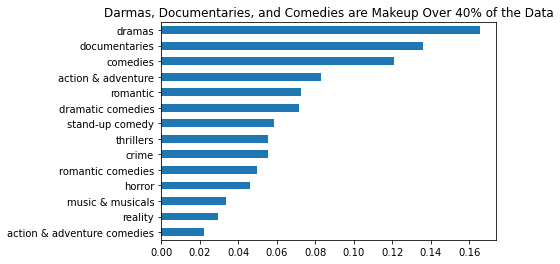

In [3]:
train.genre.value_counts(normalize=True).sort_values().plot(kind = 'barh', title = "Darmas, Documentaries, and Comedies are Makeup Over 40% of the Data")
plt.show()

* The top three genres represent over 40% of the data

### What are the most common words used across all genres?

In [4]:
train.description

2138    sick keeping love secret constantly bickering ...
1551    love air zoe friend go quest find fabled maid ...
1918    intimate indepth look beyonces celebrated 2018...
2324    crazed killer blaze trail blood anxious city h...
3049    competition show novice baker try avoid fiasco...
                              ...                        
1633    secret act skillful revenge four private schoo...
1741    argentine journalist strives prove countryman ...
660     wrongfully convicted fraud honest man find lif...
2651    spanish adaptation magic human folk age street...
1949    pair friend uncover weed bible magical stash g...
Name: description, Length: 3049, dtype: object

In [11]:
def bag_of_words(text):
    
    return text.split(' ')

In [ ]:
all_words = ' '.join(train.description).split(' ')

all_freq = pd.Series(all_words).value_counts()

all_freq.head(20).plot(kind = 'barh', title = "Top 20 Most Frequent Words Across All Genres")

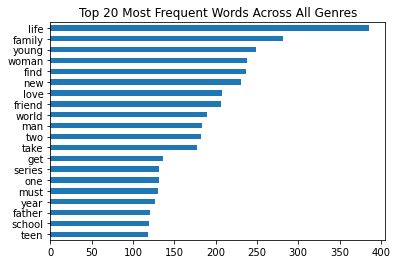

In [18]:
all_freq = pd.Series(all_words).value_counts().head(20).sort_values(ascending = True)
all_freq.plot(kind = 'barh', title = "Top 20 Most Frequent Words Across All Genres")
plt.show()